Importing the dependencies

In [34]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import zscore

from pathlib import Path
COUNTRY = "benin"
CLEAN_DIR = "../data"
CLEAN_CSV = f"{CLEAN_DIR}/{COUNTRY}_clean.csv"
SAVE_FIGS = False  # set True to also save figures to disk
FIG_DIR = "figs"

Path(CLEAN_DIR).mkdir(parents=True, exist_ok=True)
if SAVE_FIGS:
    Path(FIG_DIR).mkdir(parents=True, exist_ok=True)

loading the data

In [4]:
# Load the benin data
df = pd.read_csv(r"C:\Users\gasha\Desktop\solar-challenge-week0\data\benin-malanville.csv")
print("Dataset shape:", df.shape)

Dataset shape: (525600, 19)


# 1 Summary Statistics & Missing-Value Report

In [7]:
print("An overview of the dataset: the shape of the dataset")
df.info()

An overview of the dataset: the shape of the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600

In [8]:
print("Missing Value Report:")
print(df.isnull().sum())

Missing Value Report:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [9]:
#list any column with >5% nulls
print(f"Columns with > 5% nulls: {[col for col in df.columns if df[col].isnull().sum()/len(df) > 0.05]}")

Columns with > 5% nulls: ['Comments']


In [30]:
print("Summary for numeric columns with transposes the output:")
display(df.describe(include=[np.number]).T)

Summary for numeric columns with transposes the output:


,count,mean,std,min,25%,50%,75%,max
GHI,525600.0,240.559452,331.131327,-12.9,-2.0,1.8,483.4,1413.0
DNI,525600.0,167.187516,261.710501,-7.8,-0.5,-0.1,314.2,952.3
DHI,525600.0,115.358961,158.691074,-12.6,-2.1,1.6,216.3,759.2
ModA,525600.0,236.589496,326.894859,0.0,0.0,4.5,463.7,1342.3
ModB,525600.0,228.883576,316.536515,0.0,0.0,4.3,447.9,1342.3
Tamb,525600.0,28.179683,5.924297,11.0,24.2,28.0,32.3,43.8
RH,525600.0,54.487969,28.073069,2.1,28.8,55.1,80.1,100.0
WS,525600.0,2.121113,1.603466,0.0,1.0,1.9,3.1,19.5
WSgust,525600.0,2.809195,2.029120,0.0,1.3,2.6,4.1,26.6
WSstdev,525600.0,0.473390,0.273395,0.0,0.4,0.5,0.6,4.2


In [ ]:
# Missing values
missing_counts = df.isna().sum().sort_values(ascending=False)
percentage_missing_values = (missing_counts/len(df)*100).round(2)
display(pd.DataFrame({'Missing_count': missing_counts, 'missing %': percentage_missing_values}))

# Columns with >5% nulls
cols_over_5percent_null = percentage_missing_values[percentage_missing_values> 5]
print("Columns with > 5% nulls:", cols_over_5percent_null.to_string())


,Missing_count,missing %
Comments,525600,100.0
GHI,0,0.0
Timestamp,0,0.0
DNI,0,0.0
DHI,0,0.0
ModB,0,0.0
ModA,0,0.0
RH,0,0.0
WS,0,0.0
WSgust,0,0.0


Columns with >5% nulls: Comments    100.0


# 2 Outlier Detection & Basic Cleaning

In [ ]:
# Check outliers for selected columns for Z-score analysis
z_scores = df[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']].apply(zscore)
outliers = (z_scores.abs() > 3).sum()  # Count outliers
print("Z>|3| outliers per column:\n", outliers)

# Copy for cleaning
dfc = df.copy()

# Median impute numeric columns
num_cols = [c for c in dfc.columns if c not in ['Timestamp','Comments']]
for c in num_cols:
    if dfc[c].isna().any():
        dfc[c] = dfc[c].fillna(dfc[c].median())
        
# Floor non negatives for irradiance‑like fields
for c in ['GHI','DNI','DHI','ModA','ModB','Precipitation']:
    if c in dfc.columns:
        dfc[c] = dfc[c].clip(lower=0)

# Export cleaned CSV
dfc.to_csv(CLEAN_CSV, index=False)
print('Wrote cleaned file →', CLEAN_CSV)


Z>|3| outliers per column:
 GHI         89
DNI          0
DHI       3738
ModA        27
ModB        63
WS        3109
WSgust    3500
dtype: int64
Wrote cleaned file → ../data/benin_clean.csv


# 3 Time Series Analysis

# 4 Cleaning Impact (ModA/ModB by Cleaning flag)

,ModA,ModB
Cleaning,,
0,236.524253,228.816071
1,307.229278,301.972165


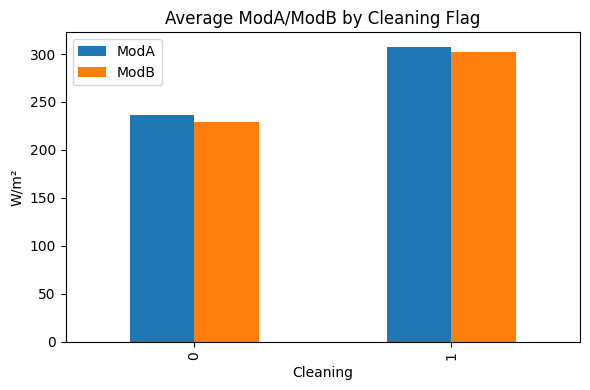

In [36]:
if 'Cleaning' in dfc.columns and dfc['Cleaning'].nunique() > 1:
      grp = dfc.groupby('Cleaning')[[c for c in ['ModA','ModB'] if c in dfc.columns]].mean()
      display(grp)
      grp.plot(kind='bar', figsize=(6,4))
      plt.title('Average ModA/ModB by Cleaning Flag'); plt.ylabel('W/m²'); plt.tight_layout()
      if SAVE_FIGS: plt.savefig(Path(FIG_DIR)/'cleaning_impact_mods.png', dpi=150)
      plt.show()
else:
      print('Cleaning flag not available or has a single value — skipping pre/post analysis.')

# 5. Correlation & Relationship Analysis

,GHI,DNI,DHI,TModA,TModB,Tamb,RH,WS,WSgust
GHI,1.000000,0.949662,0.957954,0.858386,0.835065,0.568186,-0.351468,0.488896,0.528148
DNI,0.949662,1.000000,0.869824,0.824154,0.802384,0.540594,-0.379608,0.464454,0.501135
DHI,0.957954,0.869824,1.000000,0.830262,0.807710,0.543989,-0.312120,0.478236,0.516194
TModA,0.858386,0.824154,0.830262,1.000000,0.992103,0.835742,-0.348480,0.516975,0.553995
TModB,0.835065,0.802384,0.807710,0.992103,1.000000,0.873470,-0.339550,0.502209,0.539423
Tamb,0.568186,0.540594,0.543989,0.835742,0.873470,1.000000,-0.443830,0.408138,0.429812
RH,-0.351468,-0.379608,-0.312120,-0.348480,-0.339550,-0.443830,1.000000,-0.276389,-0.269734
WS,0.488896,0.464454,0.478236,0.516975,0.502209,0.408138,-0.276389,1.000000,0.986609
WSgust,0.528148,0.501135,0.516194,0.553995,0.539423,0.429812,-0.269734,0.986609,1.000000


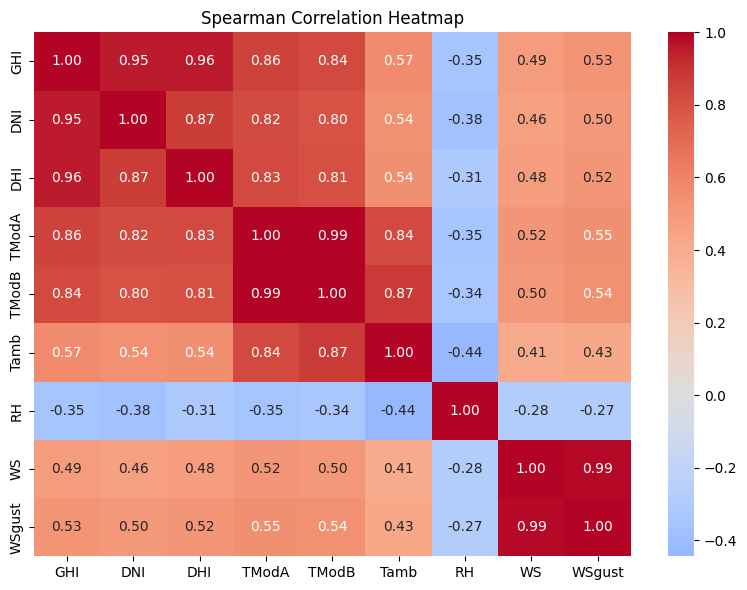

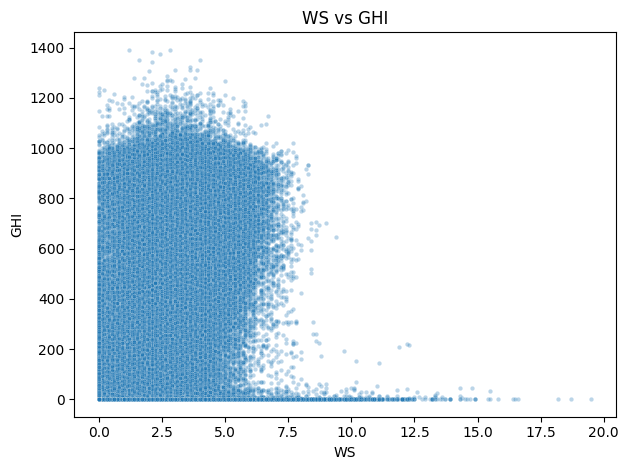

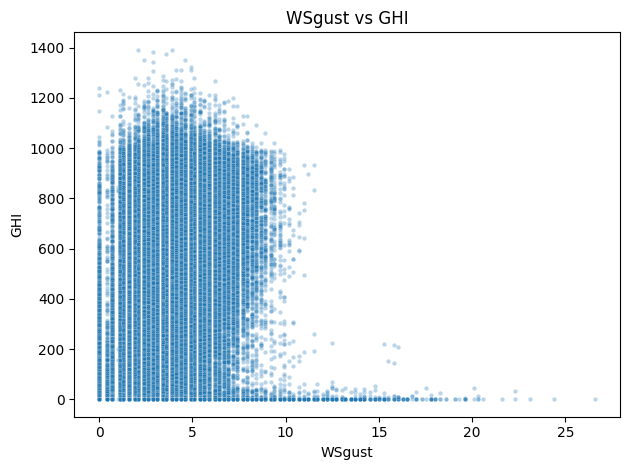

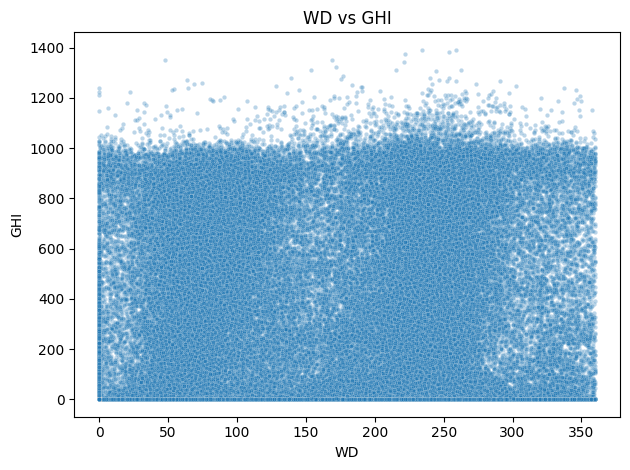

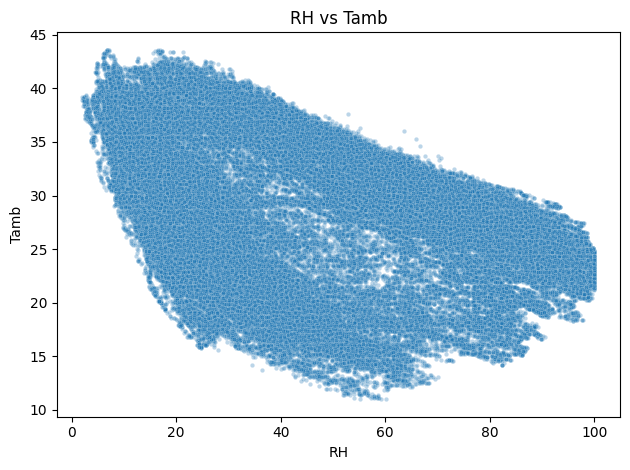

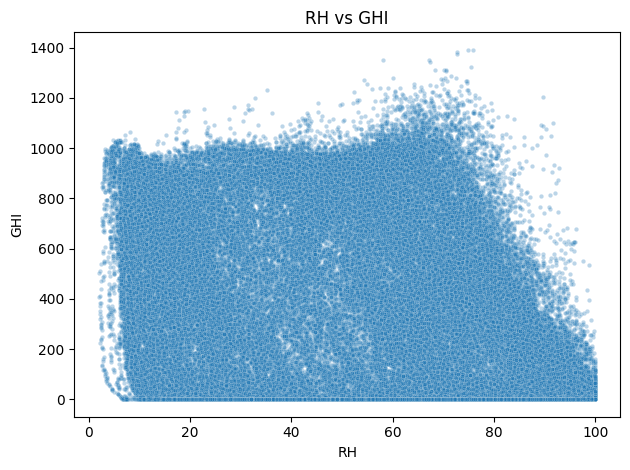

In [38]:
corr_cols = [c for c in ['GHI','DNI','DHI','TModA','TModB','Tamb','RH','WS','WSgust'] if c in dfc.columns]
if len(corr_cols) >= 2:
    corr = dfc[corr_cols].corr(method='spearman')
    display(corr)
    plt.figure(figsize=(8,6))
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
    plt.title('Spearman Correlation Heatmap'); plt.tight_layout()
    #if SAVE_FIGS: plt.savefig(Path(FIG_DIR)/'correlation_heatmap.png', dpi=150)
    plt.show()
    # Downsample for scatter plots to keep it fast
sample = dfc.sample(n=min(200000, len(dfc)), random_state=42) if len(dfc) > 200000 else dfc

if all(c in sample.columns for c in ['WS','GHI']):
    sns.scatterplot(data=sample, x='WS', y='GHI', s=10, alpha=0.3)
    plt.title('WS vs GHI'); plt.tight_layout();
    if SAVE_FIGS: plt.savefig(Path(FIG_DIR)/'scatter_WS_GHI.png', dpi=150)
    plt.show()
if all(c in sample.columns for c in ['WSgust','GHI']):
    sns.scatterplot(data=sample, x='WSgust', y='GHI', s=10, alpha=0.3)
    plt.title('WSgust vs GHI'); plt.tight_layout();
    if SAVE_FIGS: plt.savefig(Path(FIG_DIR)/'scatter_WSgust_GHI.png', dpi=150)
    plt.show()
if all(c in sample.columns for c in ['WD','GHI']):
    sns.scatterplot(data=sample, x='WD', y='GHI', s=10, alpha=0.3)
    plt.title('WD vs GHI'); plt.tight_layout();
    if SAVE_FIGS: plt.savefig(Path(FIG_DIR)/'scatter_WD_GHI.png', dpi=150)
    plt.show()
if all(c in sample.columns for c in ['RH','Tamb']):
    sns.scatterplot(data=sample, x='RH', y='Tamb', s=10, alpha=0.3)
    plt.title('RH vs Tamb'); plt.tight_layout();
    if SAVE_FIGS: plt.savefig(Path(FIG_DIR)/'scatter_RH_Tamb.png', dpi=150)
    plt.show()
    
if all(c in sample.columns for c in ['RH','GHI']):
    sns.scatterplot(data=sample, x='RH', y='GHI', s=10, alpha=0.3)
    plt.title('RH vs GHI'); plt.tight_layout();
    if SAVE_FIGS: plt.savefig(Path(FIG_DIR)/'scatter_RH_GHI.png', dpi=150)
    plt.show()

# 6 Wind & Distribution Analysis

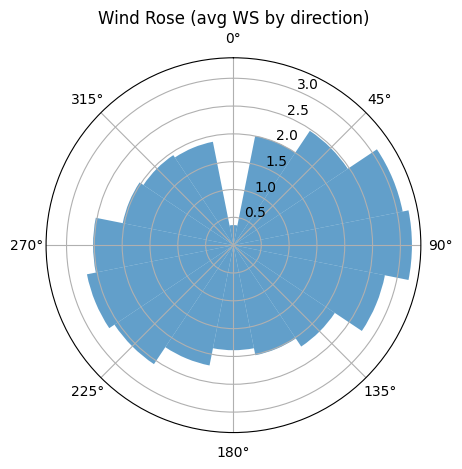

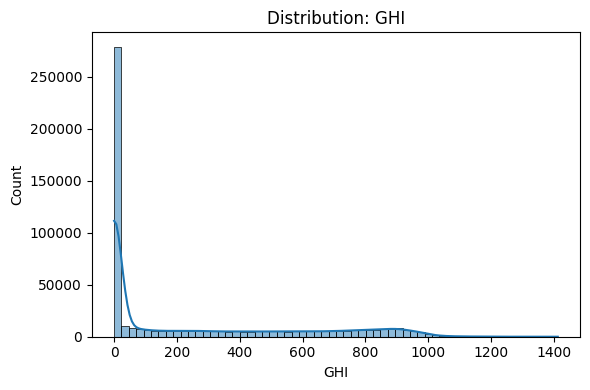

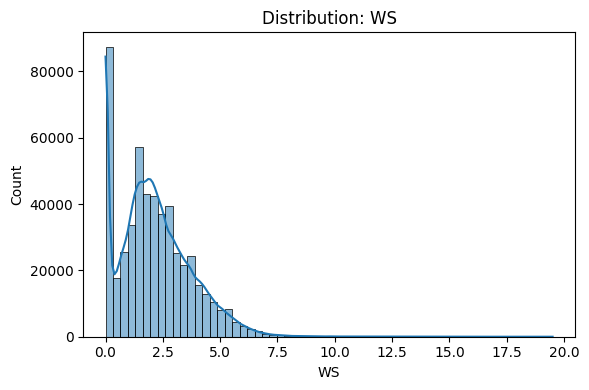

In [39]:
# Wind rose — 16 sectors
if all(c in dfc.columns for c in ['WD','WS']):
    import numpy as np
    wd = dfc['WD'].dropna().values % 360
    ws = dfc['WS'].dropna().values
    if len(wd) and len(ws):
        bins = np.linspace(0,360,17)
        sectors = np.digitize(wd, bins) - 1
        sectors[sectors==16] = 0
        mean_ws = pd.DataFrame({'sector': sectors, 'ws': ws}).groupby('sector')['ws'].mean().reindex(range(16)).fillna(0)
        theta = np.deg2rad(np.linspace(0,360,16,endpoint=False))
        width = 2*np.pi/16
        ax = plt.subplot(111, polar=True)
        ax.bar(theta, mean_ws.values, width=width, bottom=0.0, alpha=0.7)
        ax.set_theta_zero_location('N'); ax.set_theta_direction(-1)
        ax.set_title('Wind Rose (avg WS by direction)'); plt.tight_layout()
        if SAVE_FIGS: plt.savefig(Path(FIG_DIR)/'wind_rose.png', dpi=150)
        plt.show()

# Histograms
for c in [c for c in ['GHI','WS'] if c in dfc.columns]:
    plt.figure(figsize=(6,4))
    sns.histplot(dfc[c], bins=60, kde=True)
    plt.title(f'Distribution: {c}'); plt.tight_layout()
    #if SAVE_FIGS: plt.savefig(Path(FIG_DIR)/f'hist_{c}.png', dpi=150)
    plt.show()

# 7 Temperature Analysis

Spearman rho(GHI, Tamb) = 0.568
Spearman rho(GHI, RH) = -0.351
Spearman rho(Tamb, RH) = -0.444


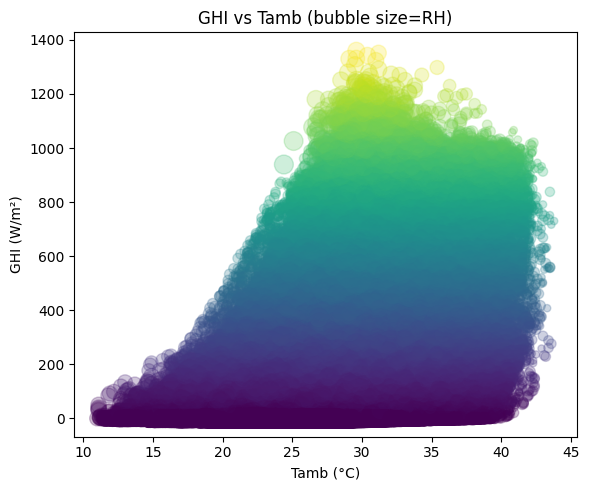

In [40]:
# Correlation readouts
for a,b in [('GHI','Tamb'),('GHI','RH'),('Tamb','RH')]:
    if a in dfc.columns and b in dfc.columns:
        rho = dfc[[a,b]].corr(method='spearman').iloc[0,1]
        print(f"Spearman rho({a}, {b}) = {rho:.3f}")

# Bubble: GHI vs Tamb (bubble size = RH or BP)
if all(c in dfc.columns for c in ['GHI','Tamb']):
    size_col = 'RH' if 'RH' in dfc.columns else ('BP' if 'BP' in dfc.columns else None)
    plt.figure(figsize=(6,5))
    plot_df = dfc.sample(n=min(120000, len(dfc)), random_state=7) if len(dfc)>120000 else dfc
    if size_col:
        s = plot_df[size_col]
        # Normalize bubble size
        sizes = 20 + 180*(s - s.min())/(s.max()-s.min() + 1e-9)
        plt.scatter(plot_df['Tamb'], plot_df['GHI'], s=sizes, alpha=0.25, c=plot_df['GHI'], cmap='viridis')
        plt.title(f'GHI vs Tamb (bubble size={size_col})')
    else:
        plt.scatter(plot_df['Tamb'], plot_df['GHI'], s=20, alpha=0.25)
        plt.title('GHI vs Tamb')
    plt.xlabel('Tamb (°C)'); plt.ylabel('GHI (W/m²)'); plt.tight_layout()
    if SAVE_FIGS: plt.savefig(Path(FIG_DIR)/'bubble_GHI_Tamb.png', dpi=150)
    plt.show()

# 8 Bubble Chart

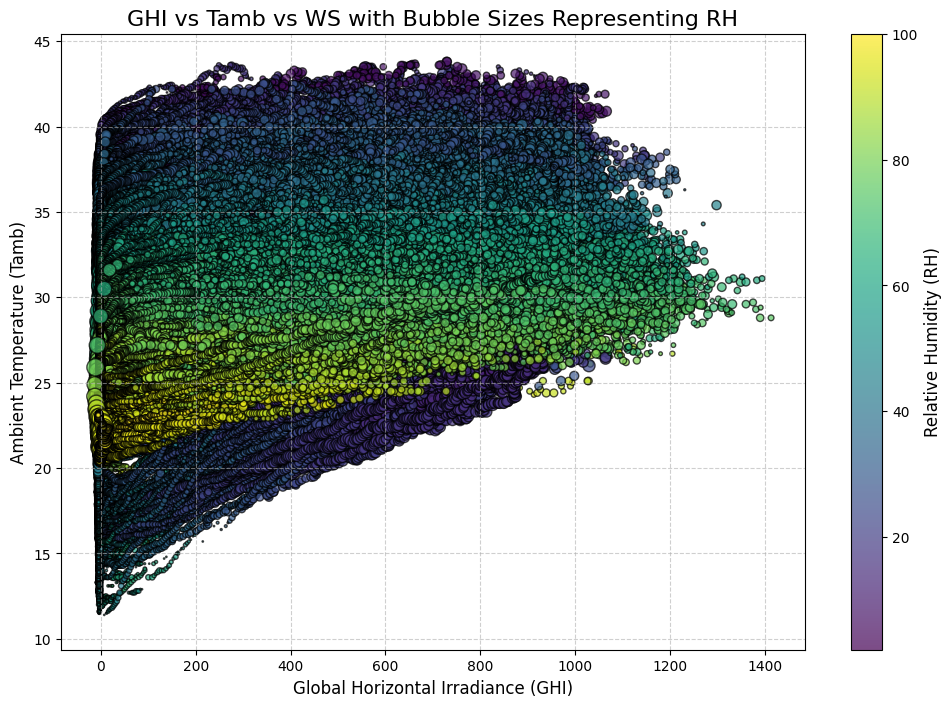

In [43]:
# Define the variables to plot
x = df['GHI']     # X-axis: Global Horizontal Irradiance
y = df['Tamb']    # Y-axis: Ambient Temperature
bubble_size = df['WS']  # Bubble size: Wind Speed
color = df['RH']  # Bubble color: Relative Humidity (RH)

# Plot the bubble chart
plt.figure(figsize=(12, 8))
bubble = plt.scatter(
    x, y, 
    s=bubble_size * 10,  # Scale bubble size for better visibility
    c=color,             # Use RH or BP for color mapping
    cmap='viridis',      # Color map for RH
    alpha=0.7,           # Transparency
    edgecolor='black'    # Bubble edges
)

# Add color bar for reference
color_bar = plt.colorbar(bubble)
color_bar.set_label('Relative Humidity (RH)', fontsize=12)

# Add labels and title
plt.title('GHI vs Tamb vs WS with Bubble Sizes Representing RH', fontsize=16)
plt.xlabel('Global Horizontal Irradiance (GHI)', fontsize=12)
plt.ylabel('Ambient Temperature (Tamb)', fontsize=12)

# Add grid
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.show()